# <center>Credit Default Prediction</center>

Прогноз кредитного дефолту

## What is Credit Default?

Що таке кредитний дефолт?

Кредитний дефолт — це неспроможність сплатити необхідні відсотки або основну суму боргу, незалежно від того, чи є цей борг позикою чи цінним папером. Окремі особи, компанії та навіть країни можуть не виконувати свої боргові зобов’язання. Ризик дефолту є важливою мірою для кредиторів. [Default Risk](https://www.investopedia.com/terms/d/defaultrisk.asp)

## Problem Statement and Analysis

> **Постановка та аналіз проблеми**

Банки відіграють вирішальну роль у ринковій економіці. Вони вирішують, хто може отримати фінансування та на яких умовах, і можуть приймати або порушувати інвестиційні рішення. Щоб ринки та суспільство функціонували, окремим особам і компаніям потрібен доступ до кредитів.

Алгоритми кредитного скорингу, які роблять припущення про ймовірність дефолту, є методами, які банки використовують, щоб визначити, чи слід надавати позику чи ні. 

> **Мета роботи:**
- *удосконалення сучасного рівня оцінки кредитоспроможності шляхом прогнозування ймовірності того, що хтось зазнає фінансових труднощів протягом наступних двох років.*
- *створити модель, яку позичальники зможуть використовувати для прийняття найкращих фінансових рішень.*



> **Key Observations**

Ключові спостереження

- Мета проекту – побудувати модель для позичальників, яка допоможе їм зрозуміти, як вони можуть покращити свою кредитоспроможність на основі своєї кредитної історії. 

  - **Пояснюваність моделі** є дуже важливою, інтерпретованість результатів моделі дають позичальникам практичну інформацію.

- Це проблема **бінарної класифікації**, де два класи визначають, чи відбудеться дефолт у позичальника протягом наступних двох років.

    - Модель має будуватися з точки зору банків, тому **хибні негативні результати (False negatives) коштують дорожче, ніж хибні спрацьовування (False positives)**, оскільки вони втрачають більше грошей. Щоб досягти цього, ми повинні надавати більше значення **recall**, ніж **precision**.

[Class Imbalance in Machine Learning Problems: A Practical Guide](https://towardsdatascience.com/class-imbalance-in-machine-learning-problems-a-practical-guide-4fb81eee0041)

[Outlier Detection in Machine Learning](https://medium.com/analytics-vidhya/outlier-detection-in-machine-learning-382557c775aa)

[Your Dataset Is Imbalanced? Do Nothing!](https://towardsdatascience.com/your-dataset-is-imbalanced-do-nothing-abf6a0049813)

## Evaluation Metric

[Classification: ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

## Data Description

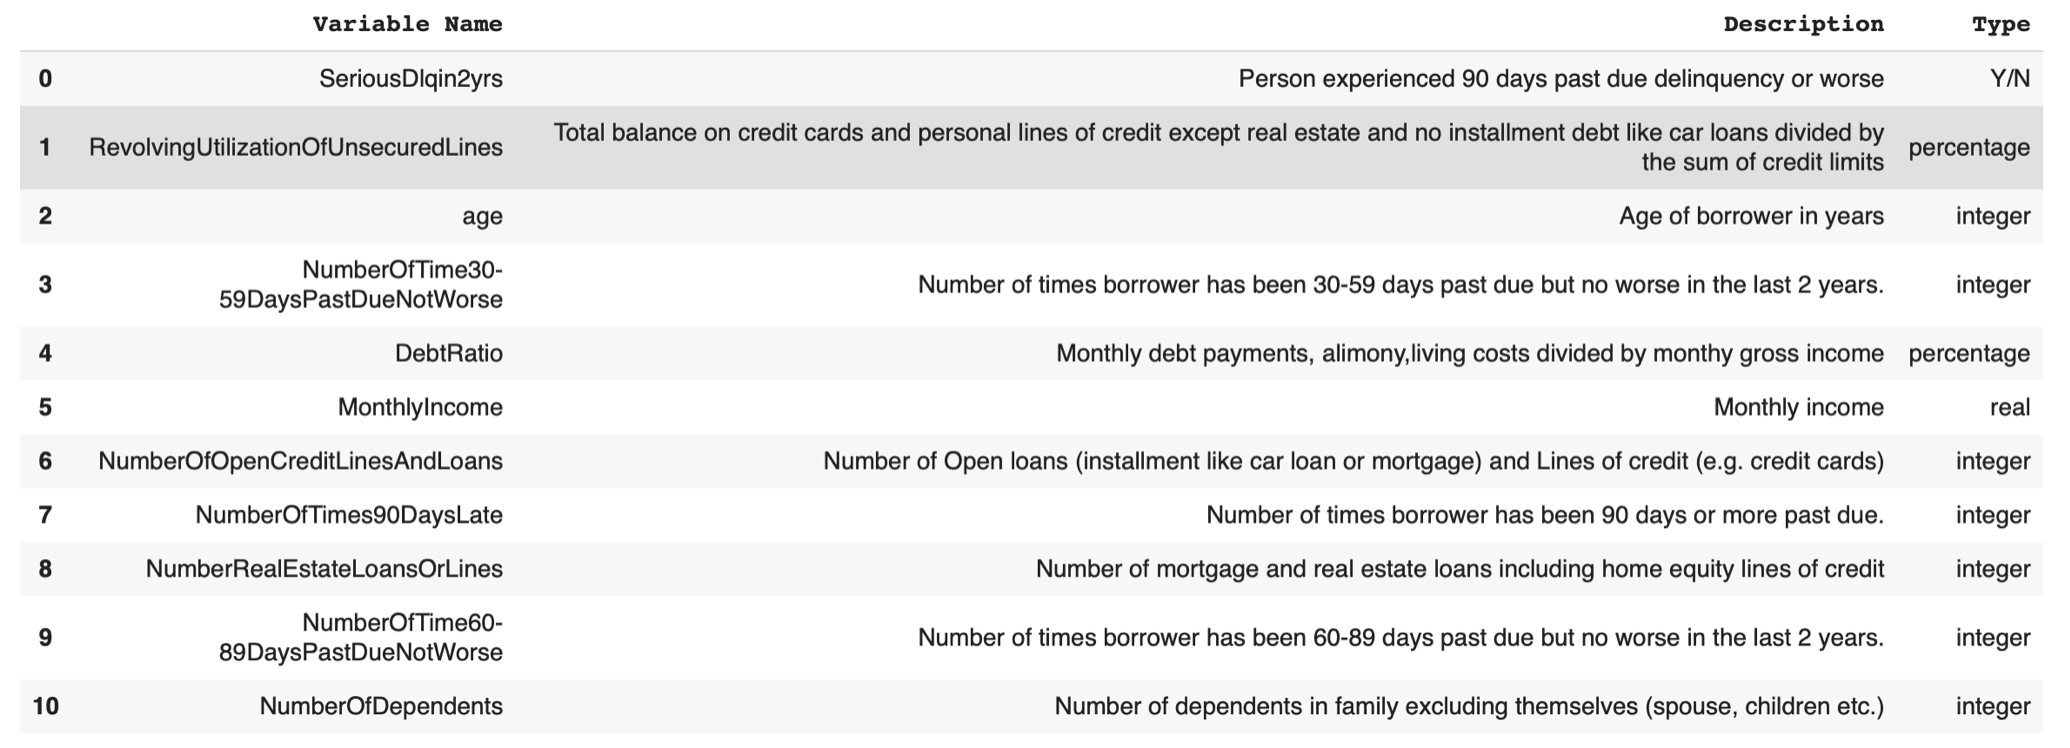

## Початковий аналіз даних

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
import missingno as msno

import os
import re
import joblib
import json
import warnings

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier


warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

## Огляд та аналіз навчального набору даних

In [2]:
df = pd.read_csv('cs-training.csv', index_col=0)## cs-training.csv
print(df.shape)
df.describe()

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


- проаналізувати основні статистичні характеристики:
  - describe;
  - shape;
  - info.

**Ваші висновки**

- Файл містить 150тис записів і 11 колонок
- всі дані є числовими (цілими або дійсними)
- Колонки MonthlyIncome, NumberOfDependents містять пропуски
- Всі дані займають 13.7 MB.
- Колонка SeriousDlqin2yrs має 2 значення 1 або 0 (тип boolean). Колонка містить більше 0.
- Колонка RevolvingUtilizationOfUnsecuredLines, DebtRatio, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse містить різні значення, але 25, 50, 75 перцептилі показують невеликі значення, проте максимальне значення велике, що схоже на викид. Тому якщо колонки буде викоистовуватись, її необхідно попередньо очистити від викидів
- Колонка age не повинна містити 0, можливо, це були пропущені дані
- NumberOfDependents максимальне значення 20, можливе але сумнівне, що це правдиве значення, адже це кількість осіб, яких утримує людина

**Питання**: можливо вже можна виділити атрибут(и), які можна видалити? 

Схоже, що колокнки NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse не несуть багато інформації, адже для більшості вони мають значення 0 (їх 25, 50, 75 показують нульові значення)

- Аналіз навчальної вибірки на пропущені значення:
  - isnull();
  - msno.matrix().

In [5]:
df.isnull().sum() / 150000

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

**Ваші висновки**

Бачимо, що колонка MonthlyIncome містить аж 20% пропущених даних, що доволі велике значення, колонка NumberOfDependents також містить пропуски, але лише 2%.
Пропуски розподілені відносно рівномірно по даних.

- Проаналізуйте відсоток нульових значень

<AxesSubplot: >

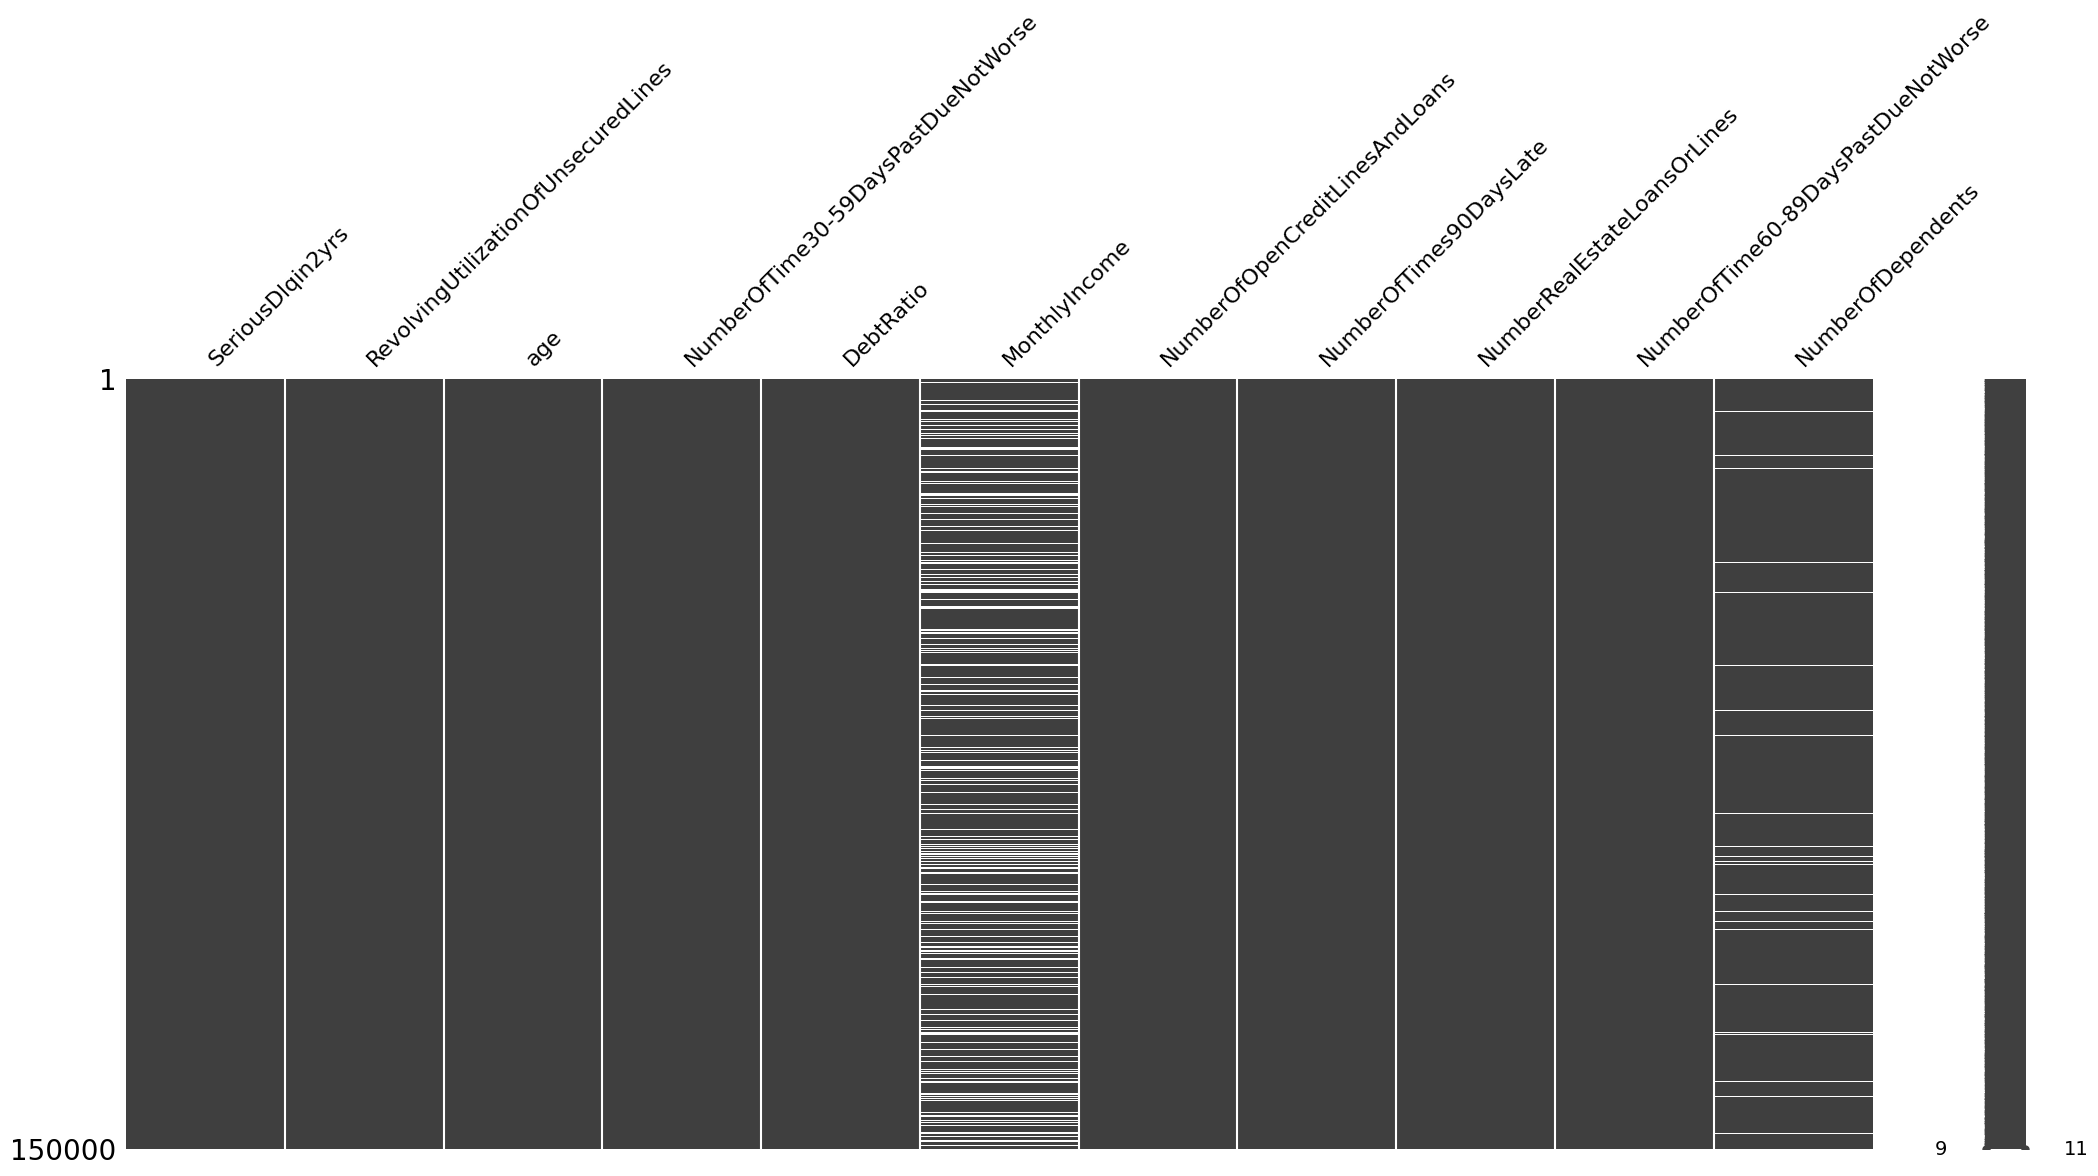

In [6]:
msno.matrix(df)

- Проаналізуйте навчальний набір даних на наявність дублікатів
  - duplicated()

In [7]:
df.duplicated().sum()

609

**Питання**: чи варто видаляти дублікати?
Дублікатів не дуже багато, лише 609, але їх також варто видаляти

(для видалення дублікатів можна скористуватись функцією `drop_duplicates`)

In [8]:
df = df.drop_duplicates()
print(df.shape)

(149391, 11)


## Аналіз залежної (Target) змінної

(array([139382.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  10009.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

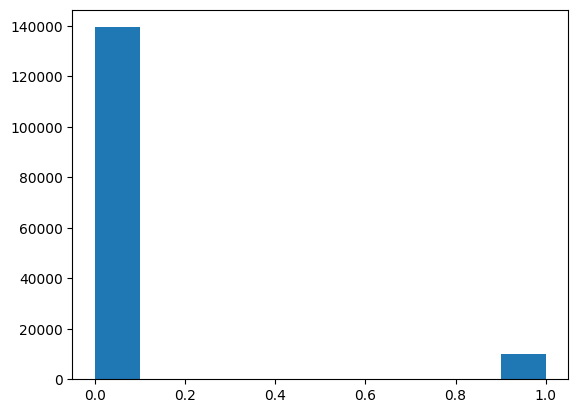

In [9]:
y = df['SeriousDlqin2yrs']
plt.hist(y)

In [10]:
y.value_counts() / len(df)

0    0.933001
1    0.066999
Name: SeriousDlqin2yrs, dtype: float64

**Ваші висновки**

Бачимо, що в цільовій колонці значний дисбаланс даних, лише 6% даних рівні 1, інші 0. Пропущених даних немає.

- Провести аналіз фічей

(array([1.49344e+05, 3.10000e+01, 9.00000e+00, 2.00000e+00, 3.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  5070.8, 10141.6, 15212.4, 20283.2, 25354. , 30424.8,
        35495.6, 40566.4, 45637.2, 50708. ]),
 <BarContainer object of 10 artists>)

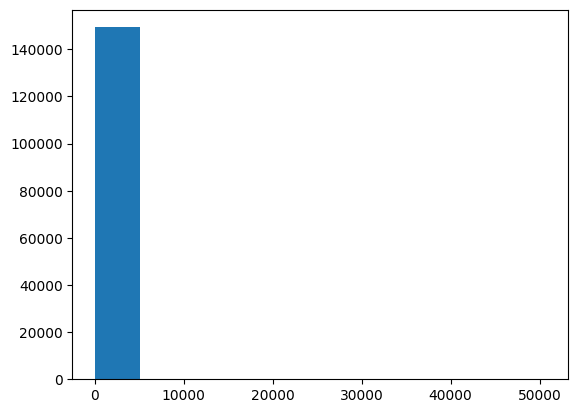

In [11]:
x = df['RevolvingUtilizationOfUnsecuredLines']
plt.hist(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e86a6a70>,
 'caps': [<matplotlib.lines.Line2D at 0x162e86d0430>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e86a7d30>],
 'medians': [<matplotlib.lines.Line2D at 0x162e86d0970>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e86d0c10>],
 'means': []}

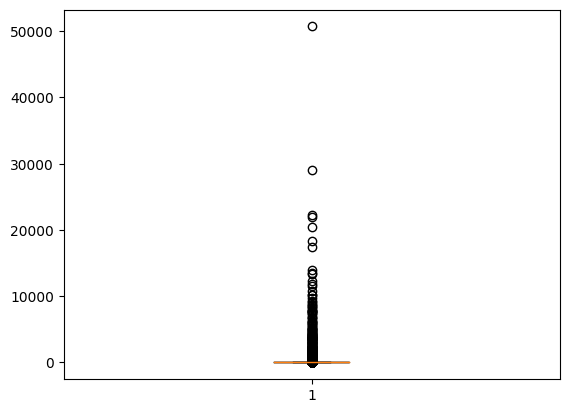

In [12]:
plt.boxplot(x)

(array([64095., 17305., 11173.,  8671.,  7159.,  6057.,  5283.,  4815.,
         5063., 16449.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

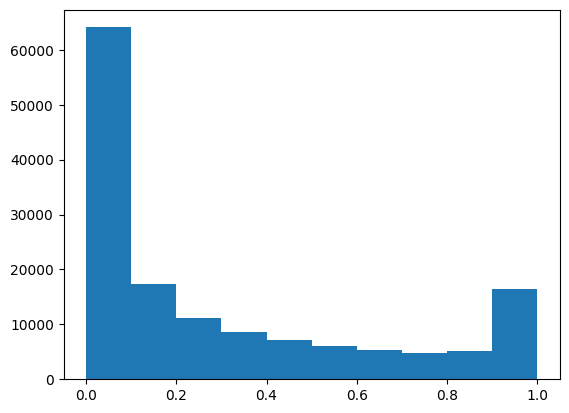

In [13]:
df1 = df[df['RevolvingUtilizationOfUnsecuredLines']<= 1]
x = df1['RevolvingUtilizationOfUnsecuredLines']
plt.hist(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e8585030>,
 'caps': [<matplotlib.lines.Line2D at 0x162e8585570>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e8584d60>],
 'medians': [<matplotlib.lines.Line2D at 0x162e8585ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e8585d50>],
 'means': []}

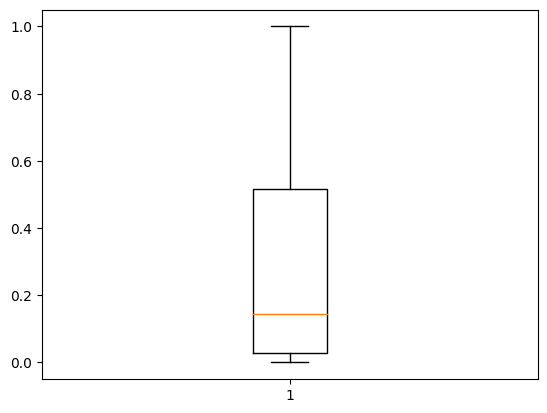

In [14]:
plt.boxplot(x)

**Ваші висновки**

- Колонка RevolvingUtilizationOfUnsecuredLines, DebtRatio, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse містить різні значення, але 25, 50, 75 перцептилі показують невеликі значення, проте максимальне значення велике, що схоже на викид. Тому якщо колонки буде викоистовуватись, її необхідно попередньо очистити від викидів

- Після видалення викидів для колонки 'RevolvingUtilizationOfUnsecuredLines' дані виглядають коректно.


(array([1.0000e+00, 1.6200e+02, 1.4455e+04, 2.9619e+04, 4.0019e+04,
        3.6728e+04, 1.9565e+04, 7.5890e+03, 1.2320e+03, 2.1000e+01]),
 array([  0. ,  10.9,  21.8,  32.7,  43.6,  54.5,  65.4,  76.3,  87.2,
         98.1, 109. ]),
 <BarContainer object of 10 artists>)

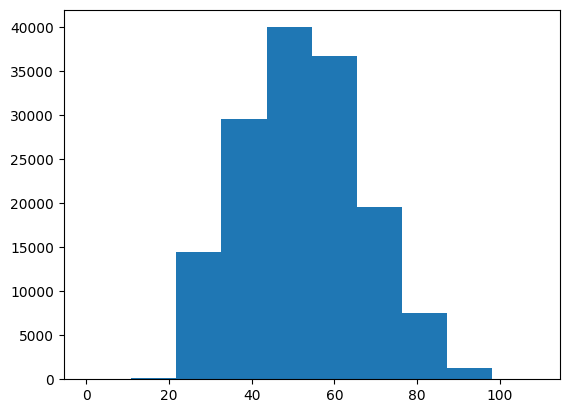

In [15]:
x = df['age']
plt.hist(x)

In [16]:
x.value_counts()

49     3834
48     3799
50     3747
47     3719
46     3710
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5693310>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5693850>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5693070>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5693d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e56cc070>],
 'means': []}

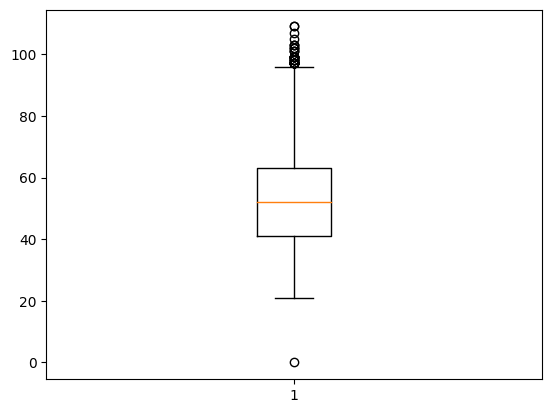

In [17]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e570e500>,
 'caps': [<matplotlib.lines.Line2D at 0x162e570ea40>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e570e260>],
 'medians': [<matplotlib.lines.Line2D at 0x162e570ef80>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e570f220>],
 'means': []}

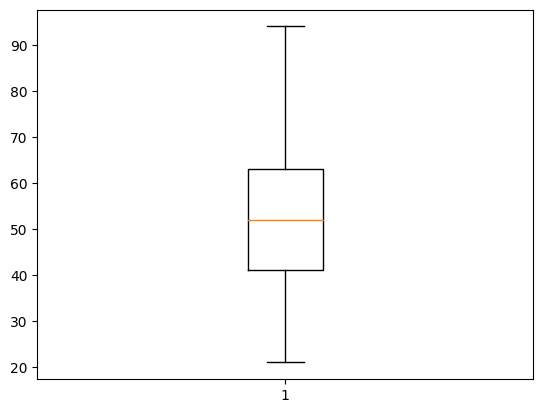

In [18]:
df1 = df[(df['age']>0) & (df['age']<95)]
x = df1['age']
plt.boxplot(x)

**Ваші висновки**

- Колонка age містить кілька викидів, викорситовуючи логічні значення для віку можемо позбутись викидів


{'whiskers': [<matplotlib.lines.Line2D at 0x162e5791f60>,
 'caps': [<matplotlib.lines.Line2D at 0x162e57924a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5791cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x162e57929e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5792c80>],
 'means': []}

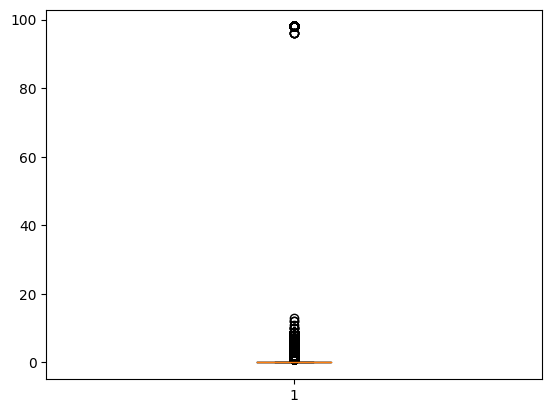

In [19]:
col = 'NumberOfTime30-59DaysPastDueNotWorse'
x = df['NumberOfTime30-59DaysPastDueNotWorse']
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e58050f0>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5805630>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5804e50>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5805b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5805e10>],
 'means': []}

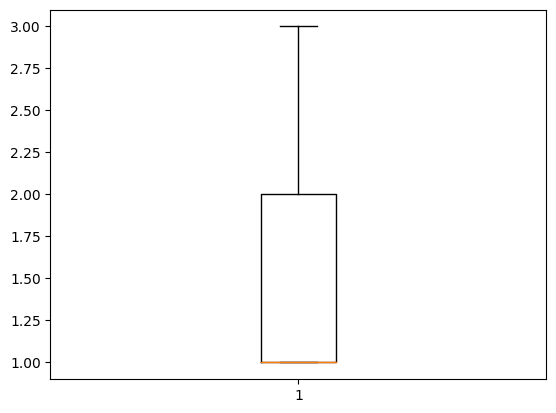

In [20]:
P = np.percentile(df[col], [0,99])
df1 = df[(df[col] > P[0]) & (df[col] < P[1])]
x = df1[col]
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5881870>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5881c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e58815d0>],
 'medians': [<matplotlib.lines.Line2D at 0x162e58821d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5882470>],
 'means': []}

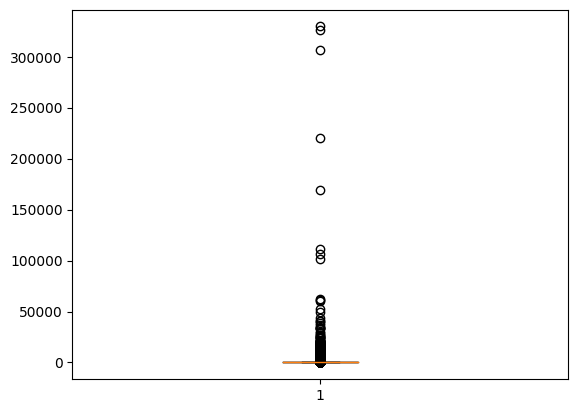

In [21]:
col = 'DebtRatio'
x = df[col]
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e58832e0>,
 'caps': [<matplotlib.lines.Line2D at 0x162e58f9180>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e58f9240>],
 'medians': [<matplotlib.lines.Line2D at 0x162e58f96f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e58f9990>],
 'means': []}

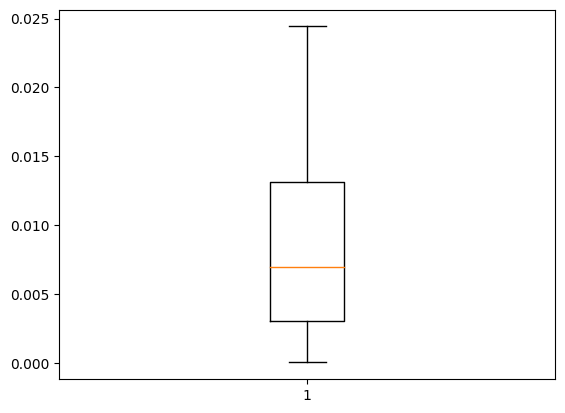

In [22]:
P = np.percentile(df[col], [0,9])
df1 = df[(df[col] > P[0]) & (df[col] < P[1])]
x = df1[col]
plt.boxplot(x)

**Ваші висновки**

- Колонка NumberOfTime30-59DaysPastDueNotWorse, DebtRatio містить велику кількість викидів, після їх видалення залишається мало даних


{'whiskers': [<matplotlib.lines.Line2D at 0x162e56cc8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x162e56e9240>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e56ced10>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5806c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e58076a0>],
 'means': []}

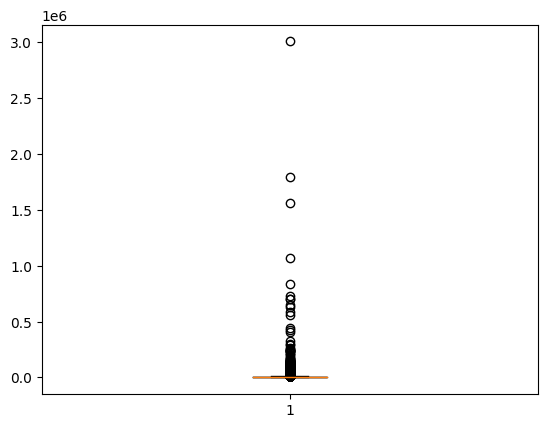

In [23]:
col = 'MonthlyIncome'
df1 = pd.DataFrame()
df1[col] = df[col].dropna()
x = df1[col]
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5acc460>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5acc9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5acc1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5accee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5acd180>],
 'means': []}

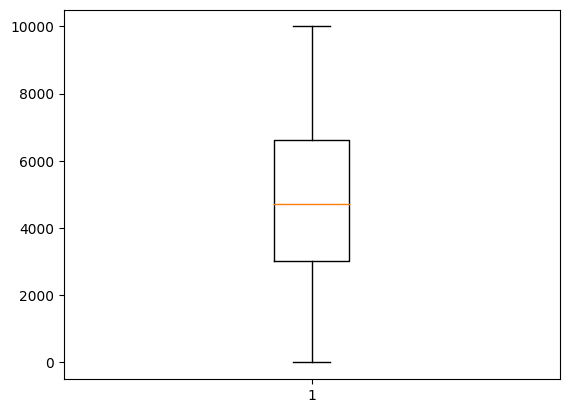

In [24]:
df1 = df[df[col] < 10000]
x = df1[col]
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5d86d40>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5d87280>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5d85bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5d877c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5d87a60>],
 'means': []}

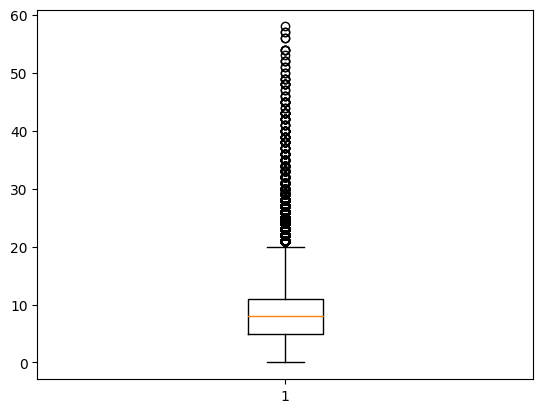

In [25]:
col = 'NumberOfOpenCreditLinesAndLoans'
x = df[col]
plt.boxplot(x)

144242


{'whiskers': [<matplotlib.lines.Line2D at 0x162e5d128c0>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5d12e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5d12620>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5d13340>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5d135e0>],
 'means': []}

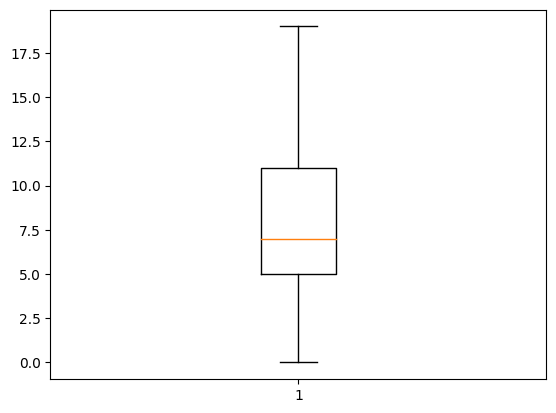

In [26]:
df1 = df[df[col] < 20]
x = df1[col]
print(len(df1))
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5c9a020>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5c9a560>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5c99d80>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5c9aaa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5c9ad40>],
 'means': []}

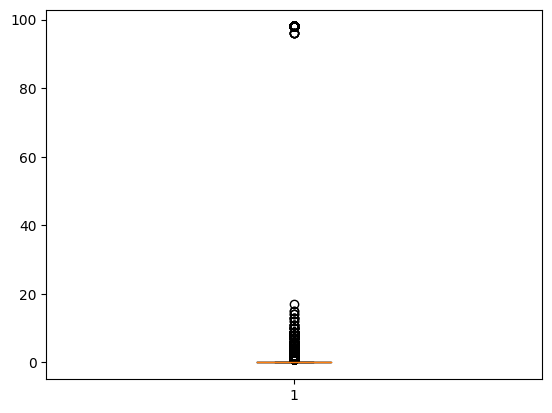

In [27]:
col = 'NumberOfTimes90DaysLate'
x = df[col]
plt.boxplot(x)

86392


{'whiskers': [<matplotlib.lines.Line2D at 0x162e6219360>,
 'caps': [<matplotlib.lines.Line2D at 0x162e62198a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e62190c0>],
 'medians': [<matplotlib.lines.Line2D at 0x162e6219cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e6219f60>],
 'means': []}

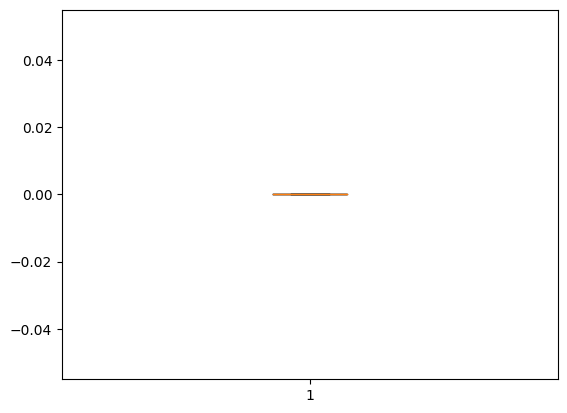

In [47]:
df1 = df[df[col] < 1]
x = df1[col]
print(len(df1))
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5c2ae00>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5c2b370>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5c2ac80>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5c2b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5c2bb50>],
 'means': []}

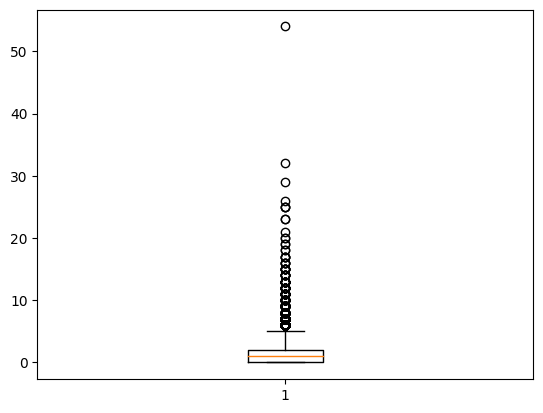

In [29]:
col = 'NumberRealEstateLoansOrLines'
x = df[col]
plt.boxplot(x)

147909


{'whiskers': [<matplotlib.lines.Line2D at 0x162e5dd1f00>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5dd2320>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5dd1c60>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5dd2860>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5dd2b00>],
 'means': []}

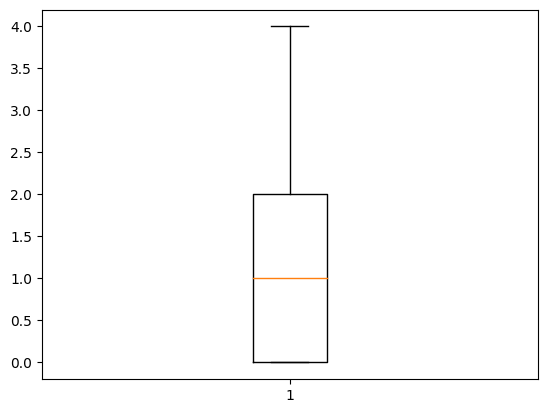

In [30]:
df1 = df[df[col] < 5]
x = df1[col]
print(len(df1))
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162e5e4a170>,
 'caps': [<matplotlib.lines.Line2D at 0x162e5e4a6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e5e49ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x162e5e4ac20>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e5e4aec0>],
 'means': []}

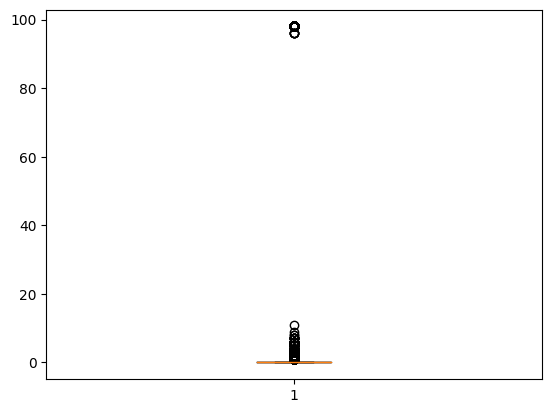

In [31]:
col = 'NumberOfTime60-89DaysPastDueNotWorse'
x = df[col]
plt.boxplot(x)

141831


{'whiskers': [<matplotlib.lines.Line2D at 0x162e60090c0>,
 'caps': [<matplotlib.lines.Line2D at 0x162e6009600>,
 'boxes': [<matplotlib.lines.Line2D at 0x162e6008e20>],
 'medians': [<matplotlib.lines.Line2D at 0x162e6009b40>],
 'fliers': [<matplotlib.lines.Line2D at 0x162e6009de0>],
 'means': []}

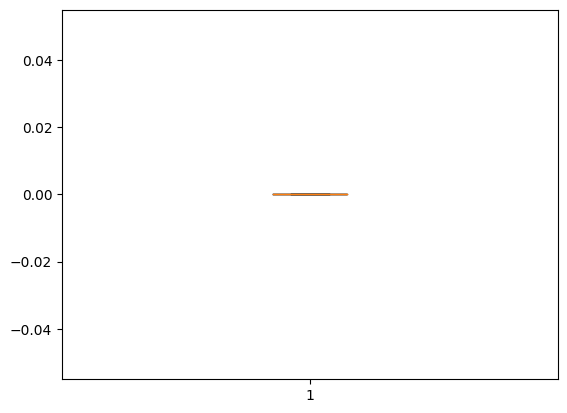

In [32]:
df1 = df[df[col] < 1]
x = df1[col]
print(len(df1))
plt.boxplot(x)

In [48]:
col = 'NumberOfDependents'
x = df[col]

(array([1.12706e+05, 2.90040e+04, 3.60800e+03, 2.09000e+02, 2.90000e+01,
        5.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

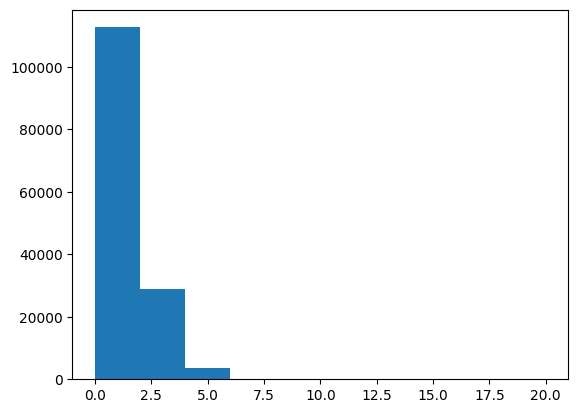

In [49]:
plt.hist(x)

(array([86392.,     0., 26314.,     0.,     0., 19521.,     0.,  9483.,
            0.,  2862.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

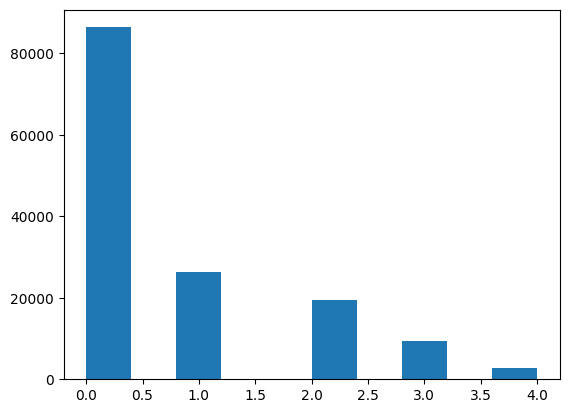

In [60]:
df1 = df[df[col] < 5]
x = df1[col]
plt.hist(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x162f1229690>,
 'caps': [<matplotlib.lines.Line2D at 0x162f1229bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162f12293f0>],
 'medians': [<matplotlib.lines.Line2D at 0x162f122a020>],
 'fliers': [<matplotlib.lines.Line2D at 0x162f122a2c0>],
 'means': []}

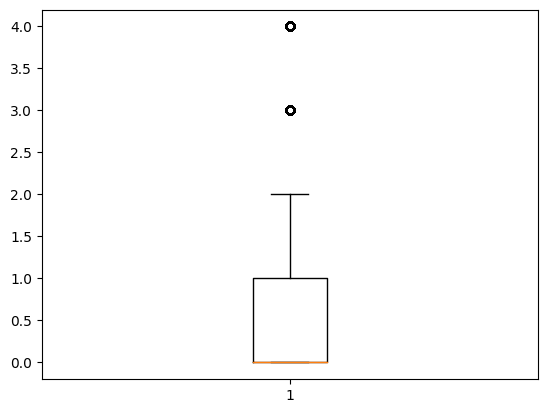

In [61]:
plt.boxplot(x)

**Ваші висновки**

- Колонка NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse містить різні значення, але 25, 50, 75 перцептилі показують невеликі значення, проте максимальне значення велике, що схоже на викид. Тому якщо колонки буде викоистовуватись, її необхідно попередньо очистити від викидів


# Додаткові функції

In [35]:
### scores

scores = {
    "Model" : list(),
    "Type" : list(),
    "ROCAUC" : list(),
    "Accuracy" : list(),
    "Precision": list(), 
    "Recall" :  list(),
    "F1_Score":list(),
}

In [36]:
def score_dataset(X, 
                  y, 
                  fold_scores=False,
                  model = LogisticRegression(solver='liblinear',random_state=42)
                  ):
    """
    To Check the performance of the given Dataset using a baseline model LogisticRegression or LGBMClassifier with StratifiedKFold.

    """
    
    model_name = str(type(model)).split(".")[-1][0:-2]
    print(f"\t\t{model_name.upper()} MODEL\n")
    
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]

        clf = model.fit(X_train, y_train.to_numpy().reshape(-1))        
        y_pred[val_idx] = clf.predict_proba(X_val)[:, 1]
        
        if fold_scores:
            print('Fold {} ROC AUC score: {:.8f}'.format(fold,roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])))

    print("CV score: {:.8f}".format(roc_auc_score(y, y_pred)))
    return

In [37]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [38]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [39]:
def classification_report_df(report):
    """
    To Extract the information from the classification report generated from the sklearn classification_report function.

    """ 
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = re.split(' +', line.strip())
        if row_data[0].strip() not in ("","accuracy"):
            row['class'] = row_data[0]
            row['Precision'] = float(row_data[1])
            row['Recall'] = float(row_data[2])
            row['F1_score'] = float(row_data[3])
            row['Observations'] = float(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.set_index("class",inplace=True)
    return dataframe

In [40]:
def stats_from_cf(cf):
    """
       To Generate the statistics of the model using the confusion matrix
    """

    stats_dict = {}
    #Accuracy is sum of diagonal divided by total observations
    accuracy  = np.trace(cf) / float(np.sum(cf))

    #if it is a binary confusion matrix, show some more stats
    try:
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_dict = {
                "Accuracy" : ["{:0.3f}".format(accuracy*100)],
                "Precision": ["{:0.3f}".format(precision*100)], 
                "Recall" :  ["{:0.3f}".format(recall*100)],
                "F1_Score": ["{:0.3f}".format(f1_score*100)],  
            }
        else:
            stats_dict =  {
                "Accuracy" : ["{:0.3f}".format(accuracy*100)]
            }
    except ZeroDivisionError:
        stats_dict =  {
                "Accuracy" : ["{:0.3f}".format(accuracy*100)]
            }
    stats_df = pd.DataFrame(stats_dict)
    return stats_df


In [41]:
def score_model(model,inputs,targets,model_name=None,record=False):
    """
    To Check the performance of the given Model using StratifiedKFold.

    """
    ### Getting the model name from model object and printing it
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]
    print(f"\t\t{model_name.upper()} MODEL\n")

    ### Creating Folds and making predictions
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_fold = np.zeros(len(inputs))

    for fold, (train_idx, val_idx) in enumerate(folds.split(inputs.values, targets.values)):
        
        X_train = inputs.iloc[train_idx]
        y_train = targets.iloc[train_idx]
        X_val = inputs.iloc[val_idx]
        y_val = targets.iloc[val_idx]

        clf = model.fit(X_train, y_train.to_numpy().reshape(-1))
        if model_name in ["LinearSVC"]:
            y_fold[val_idx] = y_current_fold = clf.decision_function(X_val)
        else:
            y_fold[val_idx] = y_current_fold = clf.predict_proba(X_val)[:, 1]
        print('Fold {} ROC AUC score: {:.8f}'.format(fold,roc_auc_score(y_val, y_current_fold)))

    ### Training the model with entire input dataset
    trained_model =  model.fit(inputs,targets)

    ### Making predictions on the trained model
    preds = trained_model.predict(inputs)
    if model_name in ["LinearSVC"]:
        prob_preds = trained_model.decision_function(inputs)
    else:
        prob_preds = trained_model.predict_proba(inputs)[:,1]
    
    ### Printing the metrics of the model
    auc_score = roc_auc_score(targets,prob_preds)
    print("\n\t\tTraining Scores\n")
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    stats = stats_from_cf(confusion_matrix(targets, preds))
    print(stats.fillna(0).to_markdown(index=False))
    
    ### Recording the stats of the model
    if record:
        scores["Model"].append(model_name)
        scores["Type"].append("Training Set")
        scores["ROCAUC"].append(auc_score * 100.0)
        scores["Accuracy"].append(float(stats["Accuracy"]))
        scores["Precision" ].append(float(stats["Precision"]))
        scores["Recall"].append(float(stats["Recall"]))
        scores["F1_Score"].append(float(stats["F1_Score"])) 

    return trained_model

## EDA

## Дослідження даних

Проаналізуйте всі фічі навчального набор даних:
  - **Звертайте увагу на те, як співідносяться фічі та цільова змінна!!**

### Опис цільової змінної
* `SeriousDlqin2yrs` - клієнт банку, який прострочив виплати на 90 днів або більше. 
* **Задача - потрібно оцінити ймовірність прострочення виплат.**

* Що таке дефолт?
Кредитний дефолт — це неспроможність сплатити необхідні відсотки або основну суму боргу, незалежно від того, чи є цей борг позикою чи цінним папером. Окремі особи, компанії та навіть країни можуть не виконувати свої боргові зобов’язання. Ризик дефолту є важливою мірою для кредиторів. [Default Risk](https://www.investopedia.com/terms/d/defaultrisk.asp)
* Що означає `«делінквент»`?
субєкт, чия поведінка є порушенням юридичної норми, у нашому випадку це особа, яка вчасно не сплачує кредит

- Проаналізувати цільву змінну:
  - Яка загальна кількість спостережень, що відосяться до класу 1 та класу 0;: 
  - Який дисбаланс між класами? (загальний та у відсотках)

- Скільки пропущенних даних містить цільова змінна? (загальна кількість по класу 0 та класу 1, та їх відсоткове співвідношення)

In [43]:
y = df['SeriousDlqin2yrs']
print(y.value_counts())
y.value_counts() / len(df)

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64


0    0.933001
1    0.066999
Name: SeriousDlqin2yrs, dtype: float64

In [44]:
y.isnull().sum()

0

**Ваші висновки**

Ми маємо 139382 записів із класу 0, 10009 класу 1, у відсотках - це 93.3% і 6.7% відповідно. 
Дані незбалансовані.
Пропущених даних немає.


Перевіряйте змінні (фічі) на співвідношення з цільовою змінною!
  - Окремо, кожну фічу, проаналізуйте на наявність важких хвостів по її гістограмі щільності розподілу.
  - Проаналізуйте фічі на викиди та аномальні значення.

In [86]:
df1 = df
df1 = df1[df1['RevolvingUtilizationOfUnsecuredLines']<= 1]
df1 = df1[(df1['age']>0) & (df['age']<95)]

col = 'MonthlyIncome'
df1[col] = df1[col].dropna()
df[df[col] < 10000]
df1 = df1[df1['NumberOfOpenCreditLinesAndLoans'] < 20]
col = 'NumberRealEstateLoansOrLines'
df1 = df1[df1[col] < 5]
col = 'NumberOfTimes90DaysLate'
df1 = df1[df1[col] < 10]
col = 'NumberOfTime60-89DaysPastDueNotWorse'
df1 = df1[df1[col] < 10]
df1 = df1[df1['NumberOfDependents'] < 5]
print(len(df1))

134958


In [87]:
df1.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.246696,-0.103846,0.249884,-0.007663,-0.018441,-0.033967,0.312323,-0.022785,0.248962,0.042573
RevolvingUtilizationOfUnsecuredLines,0.246696,1.000000,-0.264254,0.217794,-0.007459,-0.033021,-0.163983,0.229439,-0.067286,0.172877,0.090787
age,-0.103846,-0.264254,1.000000,-0.067342,0.022078,0.033458,0.143340,-0.077528,0.031363,-0.063336,-0.219177
NumberOfTime30-59DaysPastDueNotWorse,0.249884,0.217794,-0.067342,1.000000,0.002889,-0.002518,0.082398,0.212591,0.032884,0.293086,0.064383
DebtRatio,-0.007663,-0.007459,0.022078,0.002889,1.000000,-0.027283,0.043390,-0.008196,0.106064,-0.002318,-0.039679
MonthlyIncome,-0.018441,-0.033021,0.033458,-0.002518,-0.027283,1.000000,0.078086,-0.018592,0.106951,-0.010073,0.062229
NumberOfOpenCreditLinesAndLoans,-0.033967,-0.163983,0.143340,0.082398,0.043390,0.078086,1.000000,-0.104243,0.420955,-0.023994,0.083027
NumberOfTimes90DaysLate,0.312323,0.229439,-0.077528,0.212591,-0.008196,-0.018592,-0.104243,1.000000,-0.071975,0.279132,0.025769
NumberRealEstateLoansOrLines,-0.022785,-0.067286,0.031363,0.032884,0.106064,0.106951,0.420955,-0.071975,1.000000,-0.024330,0.149541
NumberOfTime60-89DaysPastDueNotWorse,0.248962,0.172877,-0.063336,0.293086,-0.002318,-0.010073,-0.023994,0.279132,-0.024330,1.000000,0.034286


In [80]:
target = 'SeriousDlqin2yrs'

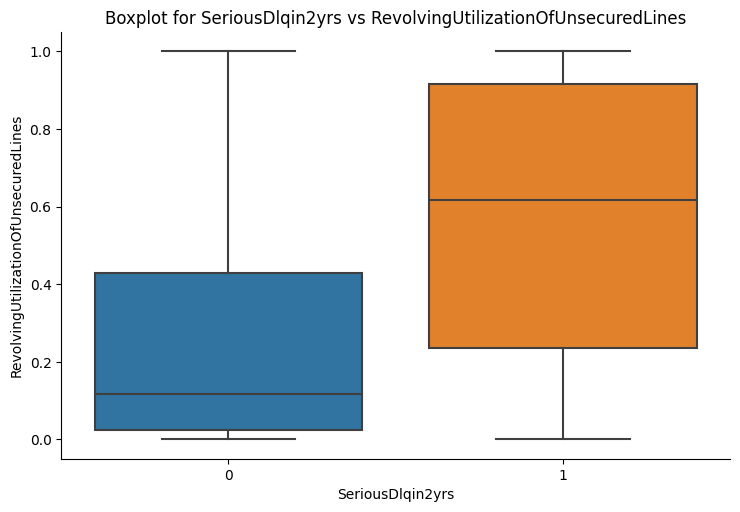

In [81]:
col = 'RevolvingUtilizationOfUnsecuredLines'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

**Ваші висновки**

На основі кореляції і boxplot бачимо сильну кореляцію між цільовою колонкою і колонкою RevolvingUtilizationOfUnsecuredLines



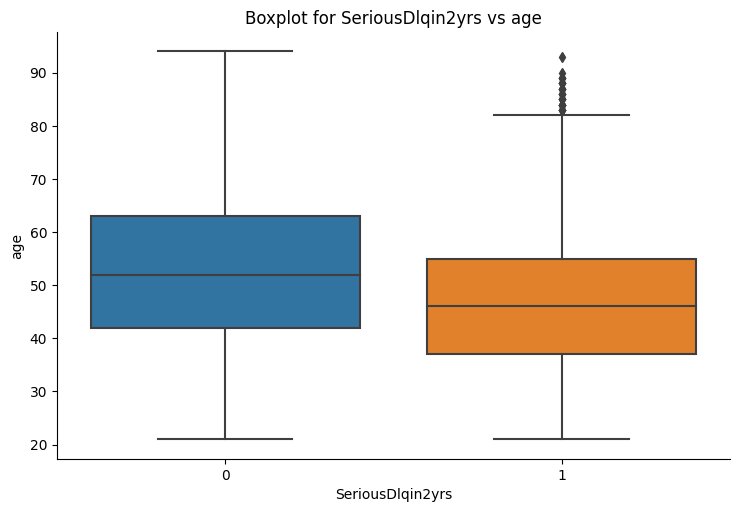

In [82]:
col = 'age'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

**Ваші висновки**

На основі кореляції і boxplot бачимо сильну кореляцію між цільовою колонкою і колонкою age



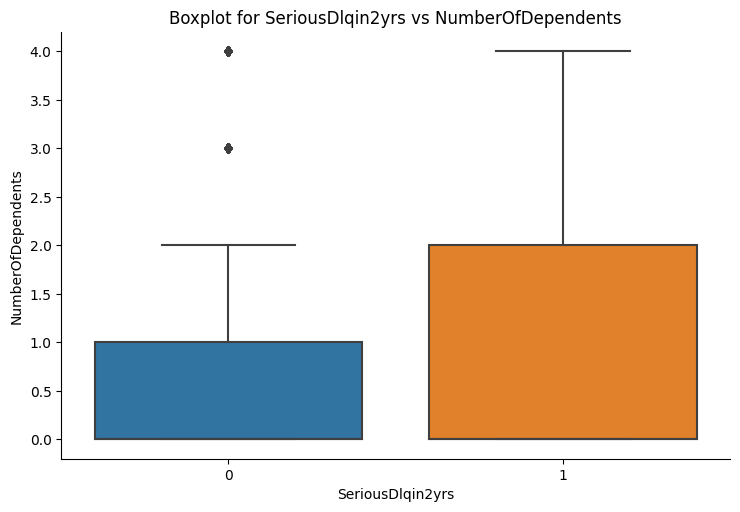

In [98]:
col = 'NumberOfDependents'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

**Ваші висновки**

На основі кореляції і boxplot бачимо незначну кореляцію між цільовою колонкою і колонкою NumberOfDependents



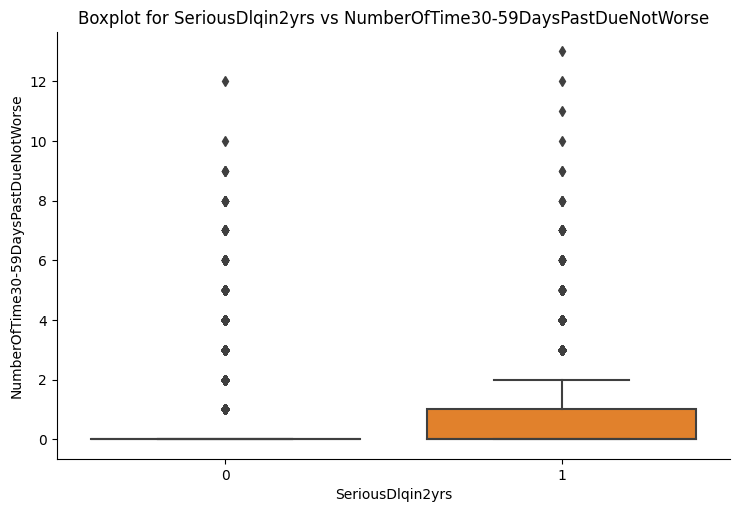

In [88]:
col = 'NumberOfTime30-59DaysPastDueNotWorse'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

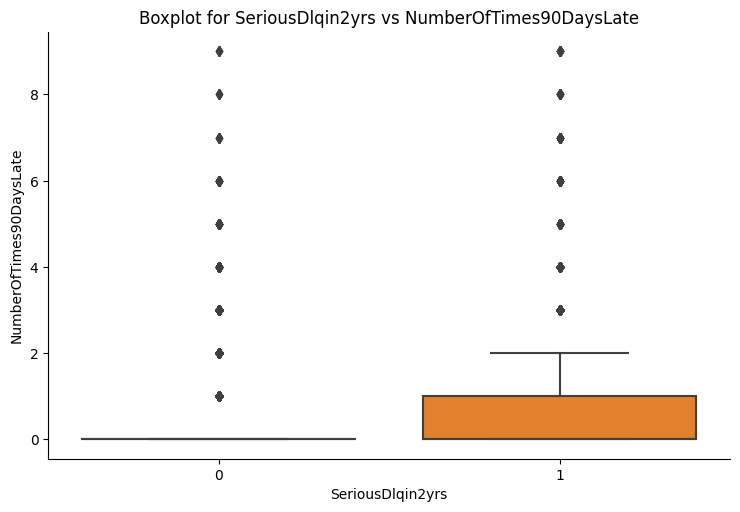

In [89]:
col = 'NumberOfTimes90DaysLate'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

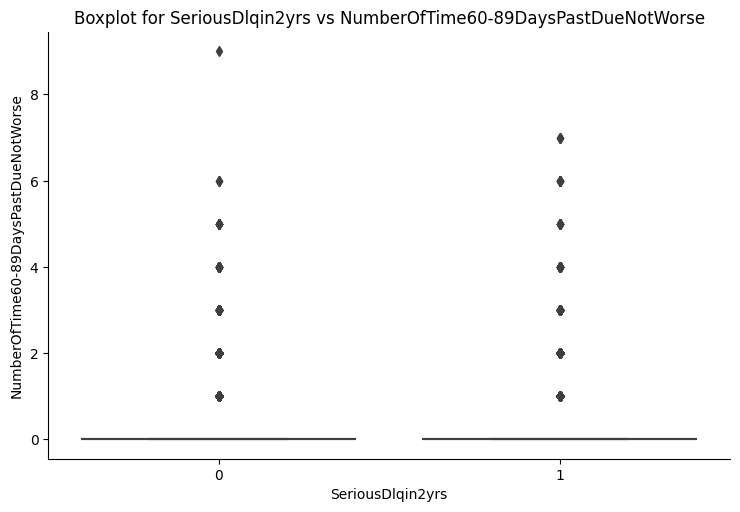

In [92]:
col = 'NumberOfTime60-89DaysPastDueNotWorse'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

**Ваші висновки**

Хоча кореляційна матриця показала для даних 3 колонок високу кореляцію, проте boxplot показує велику частину викидів, тому краще не враховувати їх при аналізі

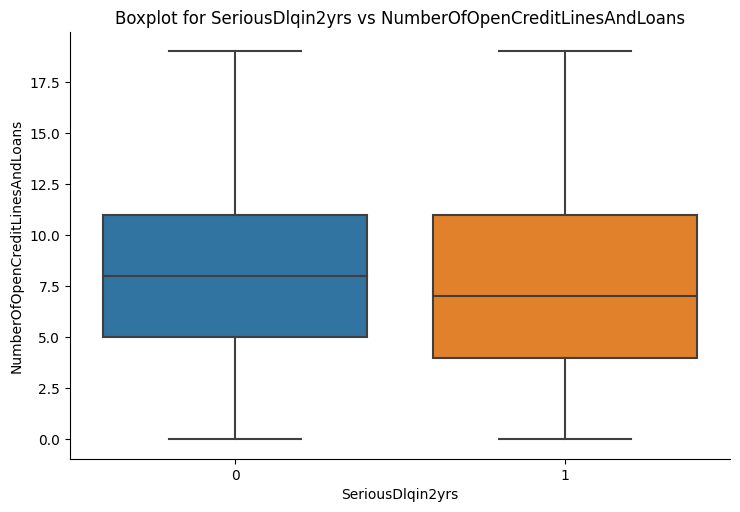

In [95]:
col = 'NumberOfOpenCreditLinesAndLoans'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

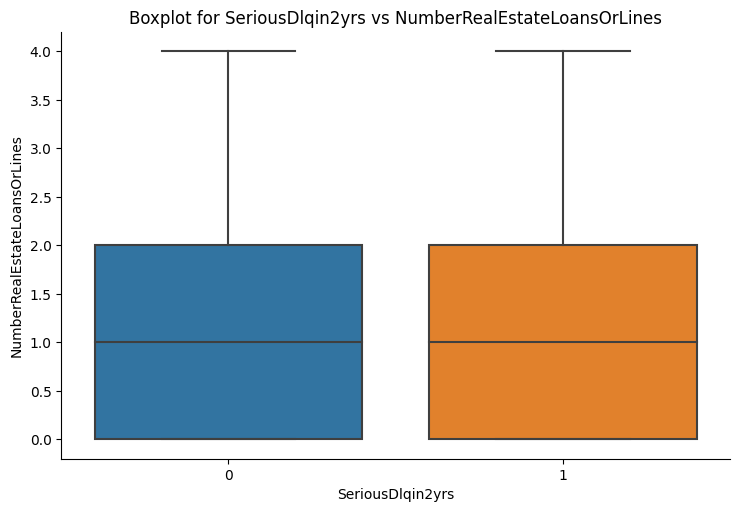

In [96]:
col = 'NumberRealEstateLoansOrLines'
sns.catplot(x=target, y=col, data=df1, kind="box", aspect=1.5)
plt.title("Boxplot for SeriousDlqin2yrs vs " + col)
plt.show()

**Ваші висновки**

Дані колонки показують низьку кореляцію з цільової змінною

Наступні колонки також погано описують цільові змінні і містять багато викидів в межах класів, якщо будувати boxplot.
'DebtRatio'
'MonthlyIncome'
'NumberOfOpenCreditLinesAndLoans'
'NumberRealEstateLoansOrLines'


**Загальні висновки**

Можемо бачити, що найбільш гарно описують цільову змінну колонки RevolvingUtilizationOfUnsecuredLines та age, можна також спробувати враховувати колокну NumberOfDependents, але її вплив менш значний. Інші колонки або не достатньо корелють з цільової змінною, або містять занадто багато викидів, тому не можуть використовуватись при аналізі.
